<a href="https://colab.research.google.com/github/sureshakukkaje/Python/blob/master/Kannada_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [99]:
#read file
data=pd.read_excel("kannada.xlsx", encoding = "utf8")
data.head()

,"ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧಿಸಿದಂತೆ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿರುವ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕಿಸ್ತಾನವನ್ನು ತೀವ್ರ ತರಾಟೆಗೆ ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ."
0,ಬ್ರಸೆಲ್ಸ್: ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧ...
1,ಯುರೋಪಿಯನ್ ಸಂಸತ್ ನಲ್ಲಿ ನಡೆದ ವಿಶೇಷ ಚರ್ಚೆಯಲ್ಲಿ ಭಾ...
2,ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡಿದ್ದಕ್ಕಾಗಿ ಪಾಕಿಸ್ತಾನದ ವ...
3,ಭಾರತ ವಿಶ್ವದಲ್ಲಿಯೇ ಅತ್ಯಂತ ಶ್ರೇಷ್ಠ ಪ್ರಜಾಪ್ರಭುತ್ವ...
4,ಈ ಉಗ್ರರು ಚಂದ್ರನಿಂದ ಬರುವುದಿಲ್ಲ.


In [100]:
data.info

<bound method DataFrame.info of   ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧಿಸಿದಂತೆ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿರುವ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕಿಸ್ತಾನವನ್ನು ತೀವ್ರ ತರಾಟೆಗೆ ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.
0  ಬ್ರಸೆಲ್ಸ್: ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧ...                                                                                                                
1  ಯುರೋಪಿಯನ್ ಸಂಸತ್ ನಲ್ಲಿ ನಡೆದ ವಿಶೇಷ ಚರ್ಚೆಯಲ್ಲಿ ಭಾ...                                                                                                                
2  ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡಿದ್ದಕ್ಕಾಗಿ ಪಾಕಿಸ್ತಾನದ ವ...                                                                                                                
3  ಭಾರತ ವಿಶ್ವದಲ್ಲಿಯೇ ಅತ್ಯಂತ ಶ್ರೇಷ್ಠ ಪ್ರಜಾಪ್ರಭುತ್ವ...                                                                                                                
4                     ಈ ಉಗ್ರರು ಚಂದ್ರನಿಂದ ಬರುವುದಿಲ್ಲ.                                                                                           

In [101]:
import os
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [103]:
corpus=PlaintextCorpusReader(os.getcwd(),"kannada.xlsx")
print(corpus)

<PlaintextCorpusReader in '/content'>


In [104]:
print("Files in this corpus : ", corpus.fileids())

Files in this corpus :  ['kannada.xlsx']


In [0]:
data.to_csv("kannada.xlsx", encoding='utf-8')

In [106]:
for record in data:
    print(record)
    print(type(record))
    print(record.split())

ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧಿಸಿದಂತೆ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿರುವ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕಿಸ್ತಾನವನ್ನು ತೀವ್ರ ತರಾಟೆಗೆ ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.
<class 'str'>
['ಜಮ್ಮು', 'ಮತ್ತು', 'ಕಾಶ್ಮೀರ', 'ವಿಚಾರಕ್ಕೆ', 'ಸಂಬಂಧಿಸಿದಂತೆ', 'ಭಾರತವನ್ನು', 'ಬೆಂಬಲಿಸಿರುವ', 'ಯುರೋಪಿಯನ್', 'ಸಂಸದರು,', 'ಭಯೋತ್ಪಾದಕರಿಗೆ', 'ಆಶ್ರಯ', 'ನೀಡುತ್ತಿರುವ', 'ಪಾಕಿಸ್ತಾನವನ್ನು', 'ತೀವ್ರ', 'ತರಾಟೆಗೆ', 'ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.']


In [107]:
for record in data:
    print(record.split())

['ಜಮ್ಮು', 'ಮತ್ತು', 'ಕಾಶ್ಮೀರ', 'ವಿಚಾರಕ್ಕೆ', 'ಸಂಬಂಧಿಸಿದಂತೆ', 'ಭಾರತವನ್ನು', 'ಬೆಂಬಲಿಸಿರುವ', 'ಯುರೋಪಿಯನ್', 'ಸಂಸದರು,', 'ಭಯೋತ್ಪಾದಕರಿಗೆ', 'ಆಶ್ರಯ', 'ನೀಡುತ್ತಿರುವ', 'ಪಾಕಿಸ್ತಾನವನ್ನು', 'ತೀವ್ರ', 'ತರಾಟೆಗೆ', 'ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.']


In [0]:
tokens = []

In [0]:
for record in data:
    tokens.append(record.split())

In [110]:
tokens

[['ಜಮ್ಮು',
  'ಮತ್ತು',
  'ಕಾಶ್ಮೀರ',
  'ವಿಚಾರಕ್ಕೆ',
  'ಸಂಬಂಧಿಸಿದಂತೆ',
  'ಭಾರತವನ್ನು',
  'ಬೆಂಬಲಿಸಿರುವ',
  'ಯುರೋಪಿಯನ್',
  'ಸಂಸದರು,',
  'ಭಯೋತ್ಪಾದಕರಿಗೆ',
  'ಆಶ್ರಯ',
  'ನೀಡುತ್ತಿರುವ',
  'ಪಾಕಿಸ್ತಾನವನ್ನು',
  'ತೀವ್ರ',
  'ತರಾಟೆಗೆ',
  'ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.']]

In [0]:
#Create an emplty list
tokens = []

In [0]:
#For each record split and append to tokens list
for record in data:
    toks = record.split()
    tokens.append(toks)

In [113]:
tokens

[['ಜಮ್ಮು',
  'ಮತ್ತು',
  'ಕಾಶ್ಮೀರ',
  'ವಿಚಾರಕ್ಕೆ',
  'ಸಂಬಂಧಿಸಿದಂತೆ',
  'ಭಾರತವನ್ನು',
  'ಬೆಂಬಲಿಸಿರುವ',
  'ಯುರೋಪಿಯನ್',
  'ಸಂಸದರು,',
  'ಭಯೋತ್ಪಾದಕರಿಗೆ',
  'ಆಶ್ರಯ',
  'ನೀಡುತ್ತಿರುವ',
  'ಪಾಕಿಸ್ತಾನವನ್ನು',
  'ತೀವ್ರ',
  'ತರಾಟೆಗೆ',
  'ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.']]

In [0]:
#Stop word removal
sw = ['ಮತ್ತು','ಅವರು', 'ನಾವು', 'ಈ', 'ಹೀಗಾಗಿ', 'ನಾವು', 'ಎಂದು', 'ಎಂದರು.']

In [115]:
print(sw)

['ಮತ್ತು', 'ಅವರು', 'ನಾವು', 'ಈ', 'ಹೀಗಾಗಿ', 'ನಾವು', 'ಎಂದು', 'ಎಂದರು.']


In [0]:
#Remove the stop words from tokens
ref_corpus = []
for record in tokens:
    new_record = []
    #print(record)
    for word in record:
        if word in sw:
            #print(word)
            pass
        else:
            new_record.append(word)
            #print(new_record)
    ref_corpus.append(new_record)
    #print(ref_corpus)

In [117]:
print(ref_corpus)

[['ಜಮ್ಮು', 'ಕಾಶ್ಮೀರ', 'ವಿಚಾರಕ್ಕೆ', 'ಸಂಬಂಧಿಸಿದಂತೆ', 'ಭಾರತವನ್ನು', 'ಬೆಂಬಲಿಸಿರುವ', 'ಯುರೋಪಿಯನ್', 'ಸಂಸದರು,', 'ಭಯೋತ್ಪಾದಕರಿಗೆ', 'ಆಶ್ರಯ', 'ನೀಡುತ್ತಿರುವ', 'ಪಾಕಿಸ್ತಾನವನ್ನು', 'ತೀವ್ರ', 'ತರಾಟೆಗೆ', 'ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.']]


In [118]:
from urllib.request import urlopen 
response = urlopen('https://www.kannadaprabha.com/world/2019/sep/18/european-parliamentarians-back-india-on-kashmir-slam-pakistan-for-harbouring-terrorists-402254.html') 
html = response.read() 
print(len(html)) 
tokens = [tok for tok in html.split()]

102758


In [119]:
 #We clean it a bit 
from bs4 import BeautifulSoup 
print("Calling BS4") 
soup = BeautifulSoup(html, 'html.parser') 
# kill all script and style elements 
for script in soup(["script", "style"]):    
    script.extract()

Calling BS4


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


<script type="text/javascript">
          if ((navigator.userAgent.match(/(iphone)|(ipod)|(android)|(blackberry)|(windows phone)|(symbian)/i))){
                  if(location.pathname=='/'){
                      var request_uri = 'https://m.kannadaprabha.com/';
                      top.location.href= request_uri;
                  }
                  else {
                      var request_uri = "https://m.kannadaprabha.com/article/world/european-parliamentarians-back-india-on-kashmir-slam-pakistan-for-harbouring-terrorists/402254";
                      top.location.href= request_uri;
                  }
              }
</script>

<script type="application/x-javascript"> addEventListener("load", function() { setTimeout(hideURLbar, 0); }, false); function hideURLbar(){ if (window.scrollY == 0) window.scrollTo(0,1); }; </script>

<script src="https://ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/slider-custom-lazy.min.js" type="text/javascript"></script>

<script type="text/javascript">
	  var Section_id = '4';
	  var PSection_id = '';
	  var GPSection_id = '';
	  var view_mode = 'live';
	  var css_path = 'https://media.kannadaprabha.com/css/FrontEnd/';
	  	   var call_active_menu = 1;
	   	    var call_otherstories = 1;
	  $(document).ready(function () {
<!--replace slick preview as arrow-->
$('.slick-prev').addClass('fa fa-chevron-left');
$('.slick-next').addClass('fa fa-chevron-right');	
});
</script>

<script type="application/ld+json">
{
	"@context":"http://schema.org",
	"@type":"NewsArticle",
	"mainEntityOfPage":{
		"@type":"WebPage",
		"@id":"https://www.kannadaprabha.com/world/2019/sep/18/european-parliamentarians-back-india-on-kashmir-slam-pakistan-for-harbouring-terrorists-402254.html"
	},
	"headline":"ಕಾಶ್ಮೀರ ವಿವಾದ: ಭಾರತದ ಬೆಂಬಲಕ್ಕೆ ನಿಂತ ಯುರ�...",
	"description":"ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧಿಸಿದಂತೆ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿರುವ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕಿಸ್ತಾನವನ್ನು ತೀವ್ರ ತರಾಟೆಗೆ ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.",
		"articleBody":"ಬ್ರಸೆಲ್ಸ್: ಜಮ್ಮು ಮತ್ತು ಕಾಶ್ಮೀರ ವಿಚಾರಕ್ಕೆ ಸಂಬಂಧಿಸಿದಂತೆ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿರುವ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕಿಸ್ತಾನವನ್ನು ತೀವ್ರ ತರಾಟೆಗೆ ತೆಗೆದುಕೊಂಡಿದ್ದಾರೆ.

ಯುರೋಪಿಯನ್ ಸಂಸತ್ ನಲ್ಲಿ ನಡೆದ ವಿಶೇಷ ಚರ್ಚೆಯಲ್ಲಿ ಭಾಗವಹಿಸಿ ಮಾತನಾಡಿದ ಸಂಸದರಾದ ರಿಸ್ಜಾರ್ಡ್ ಜಾರ್ನೆಕಿ ಮತ್ತು ಫುಲ್ವಿಯೊ ಮಾರ್ಟುಸ್ಸಿಯೆಲ್ಲೊ ಅವರು, ಭಾರತ ಶ್ರೇಷ್ಠ ಪ್ರಜಾಪ್ರಭುತ್ವವನ್ನು ಹೊಂದಿದೆ ಎಂದು ಹೇಳುವ ಮೂಲಕ ಭಾರತವನ್ನು ಬೆಂಬಲಿಸಿದ್ದಾರೆ.&amp;nbsp;

ಭಯೋತ್ಪಾದಕರಿಗೆ ಆಶ್ರಯ ನೀಡಿದ್ದಕ್ಕಾಗಿ ಪಾಕಿಸ್ತಾನದ ವಿ

<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
  ga('create', 'UA-2311935-3', 'auto');
  ga('require', 'displayfeatures');
  ga('send', 'pageview');
  setTimeout("ga('send','event','adjusted bounce rate','page visit 60 seconds or more')",60000);
</script>

<script>
var _comscore = _comscore || [];
_comscore.push({ c1: "2", c2: "16833363" });
(function() {
var s = document.createElement("script"), el = document.getElementsByTagName("script")[0]; s.async = true;
s.src = (document.location.protocol == "https:" ? "https://sb" : "http://b") + ".//scorecardresearch.com/beacon.js";
el.parentNode.insertBefore(s, el);
})();
</script>

<style>
.cssload-container-article img{
position: absolute;
    right:0;
    top: 0;
    width: 70px;
}
.cssload-container-article .cssload-zenith {
    height: 70px;
    width: 70px;
}
.cssload-container-article figure{ 
    left: 50%;
    position: fixed;
    top: 50%;
}

.CenterMarginBg{
	z-index:0;
}

@media only screen and (max-width: 1550px) and (min-width: 1297px){

.main-menu {
	 margin-left: 0 !important;
	  width: 71% ;
}
.widget-container-30 .col-lg-12{
	padding:0 !important;
}

.RightArrow {
    margin-left: 1085px;
    top: 360px;
}
.LeftArrow{
left: 38px;
}
.PrintSocial{
	left:1%;
}
}

.article-col .col-md-4{
	margin-top:3%;
}
.LeftArrow,.RightArrow{
	display:none !important;
}
.section-header,.section-content,.section-footer{
	background:transparent;
}
</style>

<script async="async" src="https://www.googletagservices.com/tag/js/gpt.js"></script>

<script>
  var googletag = googletag || {};
  googletag.cmd = googletag.cmd || [];
</script>

<script>
  googletag.cmd.push(function() {
    googletag.defineSlot('/3167926/KNP_Art_7x9_3x1', [728, 90], 'div-gpt-ad-1527580314955-0').addService(googletag.pubads());
    googletag.pubads().enableSingleRequest();
    googletag.enableServices();
  });
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527580314955-0'); });
</script>

<style>
.main_logo{	text-align: left; }
.social-icons-wrapper {	width:100% !important;    text-align: center;    margin-top: 15%; }
.large-screen-search { float: left; }
.social-icon-set { float:none; margin-right: 1px; cursor: pointer; display: inline-block; }
.social-icons-wrapper .social-icon-set-youtube { margin-right: 0; }
.social-icons-wrapper .social-icon-set-fb { margin: 0; }
.search1 { height: 40px !important;  float: left; width: 100%;}
.search1 .navbar-form { margin-top: 0px !important; width: 100%; padding: 0;}
.search1 .input-group {width: 100%;}
.search1 .input-group-btn {width: 1% !important;}
#error_throw{font-family: Droid regular !important;}
#current_time{width:100%;}

</style>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/highcharts.js"></script>

<script type="text/javascript">
			$(document).ready(function() {
				$('#SimpleSearchForm').submit(function(e){
					e.preventDefault();
					if($('#srch-term').val().trim()==''){
						$('#error_throw').html('Please provide search keyword(s)').addClass('error');
						$('#srch-term').addClass('error');
					}else{
						$('#error_throw').html('').removeClass('error');
						$('#srch-term').removeClass('error');
						window.location.href=base_url+'topic?term='+$('#srch-term').val()+'&request=ALL&search=short';
					}
					
					
				});
			});
		</script>

<script>
$(document).ready(function(){
        <!--Dropdown Menu--> 
	$( "#tabs1 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs7 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs2 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs4 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs5 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs6 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs3 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs17 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Menu--> 
	$( "#tabs14 li" ).hover( function(){
      $(this).tab('show'); 
    });
		       <!--Dropdown Me

<style>.morefrom{width: 100%;float: left;margin:2% 0 2%;} .morefrom a{font-weight:bold;color: #4672db;} .morefrom span{float:left;font-size: 16px;}</style>

<script type="text/javascript">
            $(document).ready(function() {
                $('.whatsapp').on("click", function(e) {
                    if(/Android|webOS|iPhone|iPad|iPod|BlackBerry|IEMobile|Opera Mini/i.test(navigator.userAgent) ) {

                        var article = $(this).attr("data-txt");
                        var weburl = $(this).attr("data-link");
                        var whats_app_message = article +" - "+encodeURIComponent(weburl);
                        var whatsapp_url = "whatsapp://send?text="+whats_app_message;
                        window.location.href= whatsapp_url;
						//alert(whatsapp_url);
                    }/* else{
                        alert('you are not using mobile device.');
                    } */
                });
            });
 </script>

<style>
.ArticleDetailContent li{float: none; list-style: inherit;}
.ArticleDetailContent blockquote {
    padding-left: 20px !important;
    padding-right: 8px !important;
    border-left-width: 5px;
    border-color: #ccc;
    font-style: italic;
	margin:10px 0 !important;
	padding: 12px 16px !important;
	font-size:13px !important;
}
.ArticleDetailContent blockquote p{font-size:13px !important;text-align:center;}
@media screen and ( max-width: 768px){
 audio { width:100%;}
}
</style>

<script type="text/javascript">
	var base_url        = "https://www.kannadaprabha.com/";
	var content_id      = "402254";
	var content_type_id = "1";
	var page_Indexid    = "no_pagination";
	var section_id      = "4";
	//location.reload(true);
	var content_url     = "https://www.kannadaprabha.com/world/2019/sep/18/european-parliamentarians-back-india-on-kashmir-slam-pakistan-for-harbouring-terrorists-402254.html";
	var page_param      = "4";
	var content_from    = "live";
	var bitly_url       = "";
	var bitly_message   = "";
	//$("#storyContent p:eq(0)").before($('.author_txt').show());
	//$("#storyContent p:eq(0)").before($('.agency_txt').show());
	
</script>

<script async="" charset="utf-8" src="//platform.twitter.com/widgets.js"></script>

<script type="text/javascript">

			var VUUKLE_CONFIG = {
                        apiKey: "6f27340a-c671-45a9-ae0c-13b8d5595b42",
                        articleId: "402254",                        
                        tags: "European parliamentarians , India, Pakistan,  Kashmir, ಯುರೋಪಿಯನ್ ಸಂಸತ್, ಭಾರತ, ಪಾಕಿಸ್ತಾನ, ಕಾಶ್ಮೀರ",
                        title: "ಕಾಶ್ಮೀರ ವಿವಾದ: ಭಾರತದ ಬೆಂಬಲಕ್ಕೆ ನಿಂತ ಯುರೋಪಿಯನ್ ಸಂಸದರು, ಉಗ್ರರಿಗೆ ಆಶ್ರಯ ನೀಡುತ್ತಿರುವ ಪಾಕ್ ಗೆ ತರಾಟೆ",
						recommendationsProtocol: "https://www.",
                        comments: {
                            transliteration: {
                                language: 'kn',
                                enabledByDefault: true,
                            }
                        }
                    };

                        (function () {
                            var d = document,
                                    s = d.createElement('script');
                            s.src = 'https://cdn.vuukle.com/platform.js';
  

<script type="text/javascript">
  window._taboola = window._taboola || [];
  _taboola.push({
    mode: 'thumbnails-a',
    container: 'taboola-below-article-thumbnails',
    placement: 'Below Article Thumbnails',
    target_type: 'mix'
  });
</script>

<script type="text/javascript">
  window._taboola = window._taboola || [];
  _taboola.push({flush: true});
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-0'); });
</script>

<script async="async" src="https://www.googletagservices.com/tag/js/gpt.js"></script>

<script>
  var googletag = googletag || {};
  googletag.cmd = googletag.cmd || [];
</script>

<script>
  googletag.cmd.push(function() {
    //googletag.defineSlot('/3167926/knp_stg_300x250', [300, 250], 'div-gpt-ad-1558518159601-0').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_1', [300, 250], 'div-gpt-ad-1527577603553-0').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_2', [300, 250], 'div-gpt-ad-1527577603553-1').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_3', [300, 250], 'div-gpt-ad-1527577603553-2').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_4', [300, 250], 'div-gpt-ad-1527577603553-3').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_5', [300, 250], 'div-gpt-ad-1527577603553-4').addService(googletag.pubads());
    googletag.defineSlot('/3167926/knp_art_300x250_6', [300, 250], 'div-gpt-ad-1527577603553-5').addService(googletag.pubads());
    googletag.defineSlot('/3167926/KNP_Art_300x600', [

<script type="text/javascript">
  window._taboola = window._taboola || [];
  _taboola.push({article:'auto'});
  !function (e, f, u, i) {
    if (!document.getElementById(i)){
      e.async = 1;
      e.src = u;
      e.id = i;
      f.parentNode.insertBefore(e, f);
    }
  }(document.createElement('script'),
  document.getElementsByTagName('script')[0],
  '//cdn.taboola.com/libtrc/newindianexpress-kannadaprabhacom/loader.js',
  'tb_loader_script');
  if(window.performance && typeof window.performance.mark == 'function')
    {window.performance.mark('tbl_ic');}
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-1'); });
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-2'); });
</script>

<script type="text/javascript">
$(document).ready(function(){
  $('.top_news').parent('.col-lg-12').addClass('top_news_padding');	
});
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-3'); });
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-4'); });
</script>

<script>
 function show_accordian_articles(content_type){
		 $.ajax({
			url			: 'https://www.kannadaprabha.com/user/commonwidget/get_editor_pick_content',
			method		: 'post',
			data		: { type: content_type, param: '',mode:'live'},
			beforeSend	: function() {				
			},
			success		: function(result){ 
			console.log(result);
				   $('#'+content_type+'_content').html(result).hide().fadeIn({ duration: 1000 });
				  $('#'+content_type).removeAttr('onclick');
				   console.clear();
				   }			
		});
	   }

$(document).ready(function(){
show_accordian_articles('most_read');
});	   
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-6'); });
</script>

<script>
googletag.cmd.push(function() { googletag.display('div-gpt-ad-1527577603553-7'); });
</script>

<script language="JavaScript">
var zflag_nid="791"; var zflag_cid="604"; var zflag_sid="5"; var zflag_width="1"; var zflag_height="1"; var zflag_sz="87"; 
</script>

<script language="JavaScript" src="https://tt3.zedo.com/jsc/tt3/fo.js"></script>

<script language="JavaScript">
var zflag_nid="791"; var zflag_cid="650"; var zflag_sid="5"; var zflag_width="1"; var zflag_height="1"; var zflag_sz="88"; 
</script>

<script language="JavaScript" src="https://tt3.zedo.com/jsc/tt3/fo.js"></script>

<script language="JavaScript">
var zflag_nid="791"; var zflag_cid="556"; var zflag_sid="5"; var zflag_width="1"; var zflag_height="1"; var zflag_sz="41"; 
</script>

<script language="JavaScript" src="https://tt3.zedo.com/jsc/tt3/fo.js"></script>

<script language="JavaScript">
var zflag_nid="791"; var zflag_cid="1337"; var zflag_sid="5"; var zflag_width="1"; var zflag_height="1"; var zflag_sz="33"; 
</script>

<script language="JavaScript" src="https://tt3.zedo.com/jsc/tt3/fo.js"></script>

<script async="" id="aniviewJS251993411" src="https://play.aniview.com/5b59760c073ef46a2e6b8f13/5cc96695073ef44ae8316941/NIE_Kannadaprabha.com_Desktop_Floating_Rev70_3004.Js"></script>

<script>
var $ = $.noConflict();
$(document).ready(function( $ ){
    scrollToTop.init( );
});
var scrollToTop =
{
    init: function(  ){
        //Check to see if the window is top if not then display button
        $(window).scroll(function(){
            if ($(this).scrollTop() > 100) {
                $('.scrollToTop').fadeIn();
            } else {
                $('.scrollToTop').fadeOut();
            }
        });
        // Click event to scroll to top
        $('.scrollToTop').click(function(){
            $('html, body').animate({scrollTop : 0},800);
            return false;
        });
    }
};
</script>

<script defer="defer" src="https://api.warw.in/cric3/js/script.js"></script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/remodal-article_updated.js?version=2.0"></script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/jquery.csbuttons.js" type="text/javascript"></script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/article-pagination.js" type="text/javascript"></script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/jquery.twbsPagination.min.js" type="text/javascript"></script>

<script>
var close_url = "home";
$( document ).ready(function() {
	$('#load_spinner').hide();
	$('.menu').affix({
	offset: {
	top: $('header').height()
	}
	});
});
</script>

<script src="https://media.kannadaprabha.com/js/FrontEnd/js/postscribe.min.js"></script>

<script>
		var mb_prev = $('#mb_prev').val();
		var mb_next = $('#mb_next').val();
		if(mb_prev!='' && mb_prev!=undefined){
			$('#mbn').show();
		}
		/* if(mb_next!='' && mb_next!=undefined){
			$('#mbn').show();
		} */
		function mfb(type){
			if(type=='whatsapp'){
				$('.whatsapp').click();
			}else if(type=='email'){
				var sub =$('a[data-type="twitter"]').attr('data-txt');
				var body  =$('meta[property="og:url"]').attr('content');
				window.open('mailto:?subject='+sub+'&body='+body);
			}else if(type=='prev'){
				window.location.href= mb_prev;
			}else if(type=='next'){
				window.location.href= mb_next;
			}else{
				$('a[data-type="'+type+'"]').click();
			}
		}
	</script>

In [0]:
#Get the token 
tokens = [tok for tok in soup.get_text().split()]

In [121]:
 print(tokens[0:100])

['ಕಾಶ್ಮೀರ', 'ವಿವಾದ:', 'ಭಾರತದ', 'ಬೆಂಬಲಕ್ಕೆ', 'ನಿಂತ', 'ಯುರೋಪಿಯನ್', 'ಸಂಸದರು,', 'ಉಗ್ರರಿಗೆ', 'ಆಶ್ರಯ', 'ನೀಡುತ್ತಿರುವ', 'ಪಾಕ್', 'ಗೆ', 'ತರಾಟೆ-', 'Kannada', 'Prabha', 'ರಾಜ್ಯ', 'ರಾಷ್ಟ್ರೀಯ', 'ಅಂತಾರಾಷ್ಟ್ರೀಯ', 'ಕ್ರೀಡೆ', 'ಕ್ರಿಕೆಟ್', 'ವಾಣಿಜ್ಯ', 'ಸಿನಿಮಾ', 'ಸುದ್ದಿ', 'ಬಾಲಿವುಡ್', 'ವಿಮರ್ಶೆ', 'ರಾಜಕೀಯ', 'ಆರೋಗ್ಯ', 'ಜೀವನಶೈಲಿ', 'ಫೋಟೊ', 'ಗ್ಯಾಲರಿ', 'ಸಿನಿಮಾ', 'ದೇಶ', 'ಇತರೆ', 'ಕ್ರೀಡೆ', 'ವಿಡಿಯೋ', 'ಸುದ್ದಿ', 'ಮನರಂಜನೆ', 'ಆಹಾರ', 'ವಿಹಾರ', 'ಆರೋಗ್ಯ', 'ಕ್ರೀಡೆ', 'ಪ್ರವಾಸ', '&', 'ವಾಹನ', 'ಫ್ಯಾಷನ್', '&', 'ಜೀವನಶೈಲಿ', 'ಅಂಕಣಗಳು', 'ಅಡುಗೆ', 'ಆಧ್ಯಾತ್ಮ', 'ತಂತ್ರಜ್ಢಾನ', 'ವಾಹನ', 'ವಿಶೇಷ', 'Wednesday,', 'September,', '18,', '2019', 'Toggle', 'navigation', 'ರಾಜ್ಯ', 'ರಾಷ್ಟ್ರೀಯ', 'ಅಂತಾರಾಷ್ಟ್ರೀಯ', 'ಕ್ರೀಡೆ', 'ಕ್ರಿಕೆಟ್', 'ವಾಣಿಜ್ಯ', 'ಸಿನಿಮಾ', 'ಸಿನಿಮಾ', 'ಸುದ್ದಿ', 'ಸಿನಿಮಾ', 'ವಿಮರ್ಶೆ', 'ಬಾಲಿವುಡ್', 'ರಾಜಕೀಯ', 'ಆರೋಗ್ಯ', 'ಜೀವನಶೈಲಿ', 'ಅಂಕಣಗಳು', 'Toggle', 'navigation', 'ಫೋಟೊ', 'ಗ್ಯಾಲರಿವಿಡಿಯೋಸಿನಿಮಾ', 'ಸುದ್ದಿಬಾಲಿವುಡ್ಆಧ್ಯಾತ್ಮತಂತ್ರಜ್ಞಾನವಾಹನಅಡುಗೆವಿಶೇಷಗ್ಯಾಲರಿ', 'ಮುಖಪುಟ', 'ಅಂತಾರಾಷ್ಟ್ರೀಯ', 'ಕಾಶ್ಮೀರ', 'ವಿವಾದ:', 'ಭಾರತದ', 'ಬೆಂಬಲಕ್ಕೆ', 'ನಿಂತ', 'ಯುರೋಪಿಯನ್', 'ಸಂಸದರು,', '

In [0]:
def wordfreq (words):    
    """Function to generated the frequency distribution of the 
given text"""    
    word_freq={}    
    for tok in words:        
        if tok.lower() in word_freq:            
            word_freq [tok.lower()]+=1        
        else:            
            word_freq [tok.lower()]=1    
    return word_freq

In [0]:
new_tokens = wordfreq(tokens)

<FreqDist with 344 samples and 484 outcomes>
[('|', 22), ('ಯುರೋಪಿಯನ್', 8), ('ಕಾಶ್ಮೀರ', 6), ('ಸಂಸದರು,', 5), ('ಆಶ್ರಯ', 5), ('ಸಿನಿಮಾ', 5), ('ಎಂದು', 5), ('ಭಾರತದ', 4), ('ನೀಡುತ್ತಿರುವ', 4), ('ಅಂತಾರಾಷ್ಟ್ರೀಯ', 4), ('ಕ್ರೀಡೆ', 4), ('ಸುದ್ದಿ', 4), ('2019', 4), ('ಮತ್ತು', 4), ('ಭಾರತವನ್ನು', 4), ('ಆರೋಗ್ಯ', 3), ('ಜೀವನಶೈಲಿ', 3), ('ಫೋಟೊ', 3), ('&', 3), ('ಜಮ್ಮು', 3), ('ಭಯೋತ್ಪಾದಕರಿಗೆ', 3), ('ಭಾರತ', 3), ('ಚಿತ್ರದ', 3), ('Us', 3), ('ವಿವಾದ:', 2)]


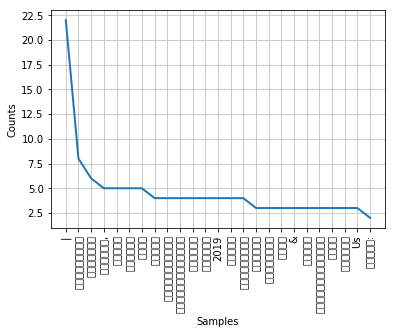

In [124]:
import nltk 
import operator 
%matplotlib inline 
Freq_dist_nltk=nltk.FreqDist(tokens) 
print(Freq_dist_nltk) 
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True) 
print(sorted_d[:25]) 
Freq_dist_nltk.plot(25, cumulative=False)

In [0]:
from wordcloud import WordCloud 

from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("every")
stopwords.add("will")
stopwords.add("News")
stopwords.add("Live")

In [0]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

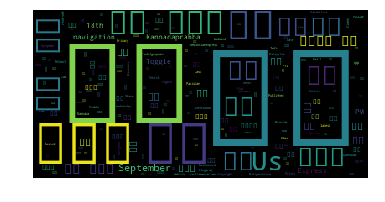

In [127]:
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(soup.get_text())
plot_wordcloud(wordcloud)